<a href="https://colab.research.google.com/github/builesk/code1/blob/main/trabajo_final(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese la temperatura del borde inferior: 1
Ingrese la temperatura del borde superior: 10
Ingrese la temperatura del borde lateral derecha: 2
Ingrese la temperatura del borde lateral izquierda: 1


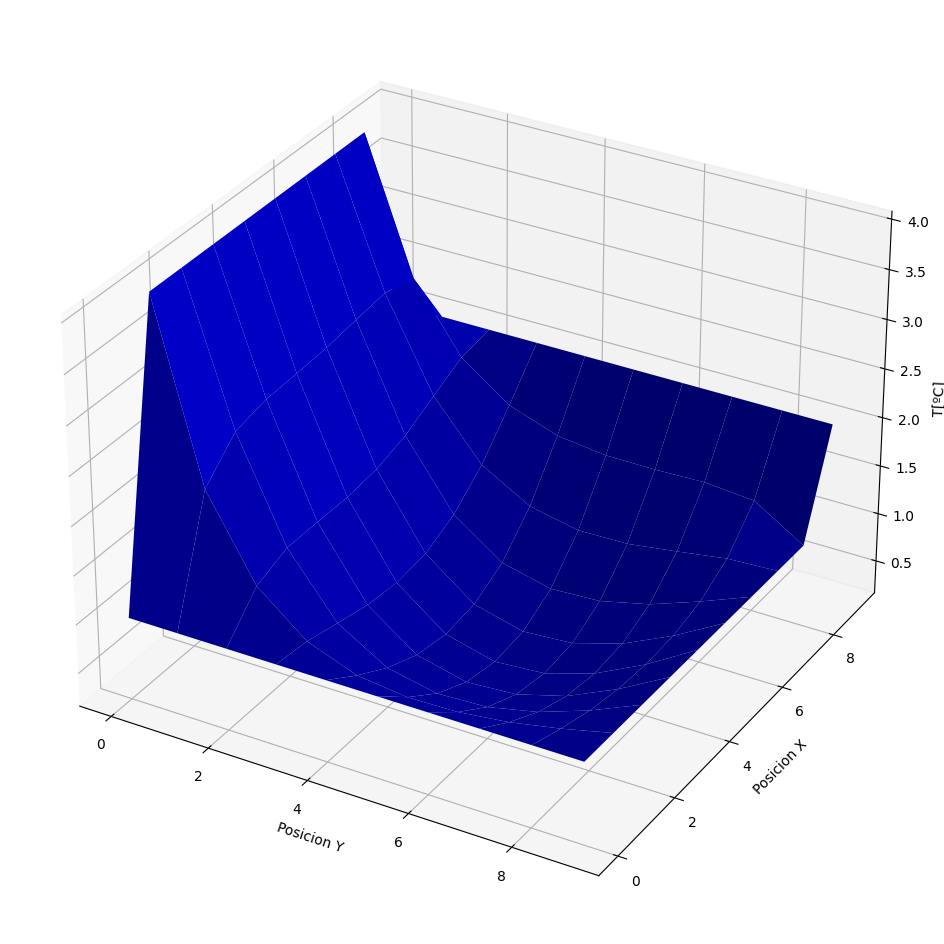

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# Importamos las liberias necesarias
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Datos fijos
placa_dimension = 10

#Promedio con el ultimo dijito de la CC de cada integrante del grupo
temp_inicial = (4+3)/2

# Tamaño de la gráfica
figsize=(12, 12)

# Datos personalizados e ingresados por el usuarios
temp_borde_inferior = int(input('Ingrese la temperatura del borde inferior: '))
temp_borde_superior = int(input('Ingrese la temperatura del borde superior: '))
temp_borde_lateral_derecha  = int(input('Ingrese la temperatura del borde lateral derecha: '))
temp_borde_lateral_izquierda = int(input('Ingrese la temperatura del borde lateral izquierda: '))


def simulacion_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize):
    # Crear un arreglo tridimensional para almacenar la distribución de temperatura
    T = np.zeros((placa_dimension, placa_dimension, temp_borde_superior))

    # Inicializar condiciones de contorno
    T[0, :, :] = temp_inicial
    T[placa_dimension - 1, :, :] = temp_borde_inferior
    T[:, 0, :] = temp_borde_lateral_izquierda
    T[:, placa_dimension - 1, :] = temp_borde_lateral_derecha

    # Bucle de simulación
    for k in range(1, temp_borde_superior):
        for i in range(1, placa_dimension - 1):
            for j in range(1, placa_dimension - 1):
                # Calcular la temperatura en cada punto promediando las temperaturas de los puntos adyacentes
                T[j, i, k] = (T[j + 1, i, k - 1] + T[j - 1, i, k - 1] + T[j, i + 1, k - 1] + T[j, i - 1, k - 1]) / 4

    return T

def plot_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize):
    # Realizar la simulación del calor
    T = simulacion_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

    # Crear una figura y un subplot 3D
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Generar una malla 2D de coordenadas X e Y
    x = np.arange(0, placa_dimension, 1)
    y = np.arange(0, placa_dimension, 1)
    X, Y = np.meshgrid(x, y)

    # Dibujar una superficie 3D que representa la distribución de temperatura en el último paso de tiempo
    ax.plot_surface(Y, X, T[:, :, -1], color='b')

    # Establecer etiquetas de ejes
    ax.set_xlabel('Posicion Y')
    ax.set_ylabel('Posicion X')
    ax.set_zlabel('T[ºC]')

    # Mostrar la gráfica
    plt.figure(figsize=(16, 16))
    plt.show()

# Ejemplo de uso:
plot_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

In [ ]:
def calcular_velocidad_incremento_temp(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha):
    # Realizar la simulación del calor
    T = simulacion_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

    # Coordenadas del punto medio de la placa
    medio_x = placa_dimension // 2
    medio_y = placa_dimension // 2

    # Calcular la tasa de cambio de temperatura en el punto medio
    delta_t = 1  # Suponemos que el intervalo de tiempo es 1 en este ejemplo
    velocidad_incremento_temp = []
    for k in range(1, temp_borde_superior):
        T_medio_actual = T[medio_x, medio_y, k]
        T_medio_siguiente = T[medio_x, medio_y, k - 1]
        tasa_cambio_temp = (T_medio_siguiente - T_medio_actual) / delta_t
        velocidad_incremento_temp.append(tasa_cambio_temp)

    return velocidad_incremento_temp

# Ejemplo de uso para calcular la velocidad de incremento de temperatura
velocidad_incremento_temp = calcular_velocidad_incremento_temp(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha)

# Imprimir resultados
print("Velocidad de incremento de temperatura en el punto medio:")
for i, velocidad in enumerate(velocidad_incremento_temp):
    print(f"Paso de tiempo {i + 1}: {velocidad} ºC/s")


Velocidad de incremento de temperatura en el punto medio:
Paso de tiempo 1: 0.0 ºC/s
Paso de tiempo 2: 0.0 ºC/s
Paso de tiempo 3: 0.0 ºC/s
Paso de tiempo 4: -0.01171875 ºC/s
Paso de tiempo 5: -0.0283203125 ºC/s
Paso de tiempo 6: -0.04443359375 ºC/s
Paso de tiempo 7: -0.05792236328125 ºC/s
Paso de tiempo 8: -0.0667572021484375 ºC/s
Paso de tiempo 9: -0.07274627685546875 ºC/s


In [ ]:
def calcular_velocidad_promedio_temp(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha):
    # Realizar la simulación del calor
    T = simulacion_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

    # Coordenadas del punto medio de la placa
    medio_x = placa_dimension // 2
    medio_y = placa_dimension // 2

    # Calcular la temperatura en el punto medio en el tiempo inicial (T en cero) y en el último paso de tiempo
    T_inicial = T[medio_x, medio_y, 0]
    T_ultimo = T[medio_x, medio_y, -1]

    # Calcular la velocidad promedio de incremento de temperatura
    delta_t = temp_borde_superior  # Suponemos que el intervalo de tiempo es el número total de pasos de tiempo
    velocidad_promedio_temp = (T_ultimo - T_inicial) / delta_t

    return velocidad_promedio_temp

# Ejemplo de uso para calcular la velocidad promedio de incremento de temperatura
velocidad_promedio_temp = calcular_velocidad_promedio_temp(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha)

# Imprimir el resultado
print(f"Velocidad promedio de incremento de temperatura entre T en cero y T en el último: {velocidad_promedio_temp} ºC/s")


Velocidad promedio de incremento de temperatura entre T en cero y T en el último: 0.028189849853515626 ºC/s


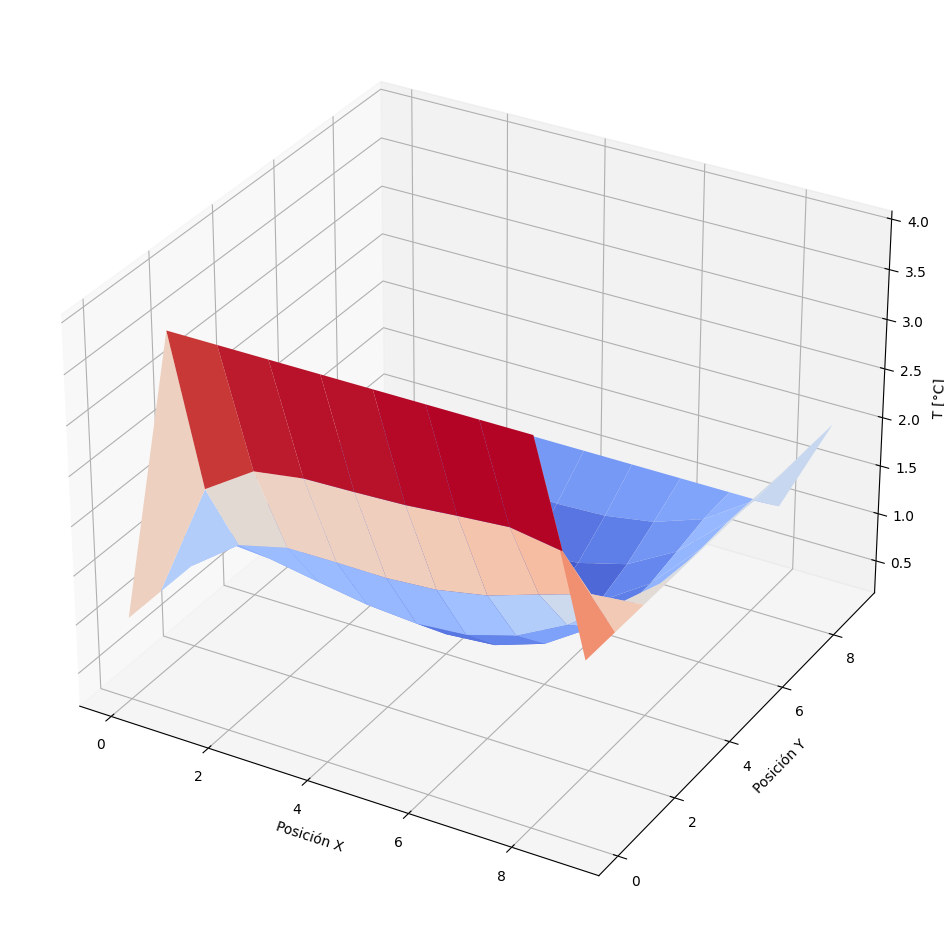

In [ ]:
def plot_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize):
    # Realizar la simulación del calor
    T = simulacion_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

    # Crear una figura y un subplot 3D
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Generar una malla 2D de coordenadas X e Y
    x = np.arange(0, placa_dimension, 1)
    y = np.arange(0, placa_dimension, 1)
    X, Y = np.meshgrid(x, y)

    # Dibujar una superficie 3D que representa la distribución de temperatura en el último paso de tiempo
    ax.plot_surface(X, Y, T[:, :, -1], cmap='coolwarm')  # Corregir el orden de X y Y y usar cmap 'coolwarm'

    # Establecer etiquetas de ejes
    ax.set_xlabel('Posición X')
    ax.set_ylabel('Posición Y')
    ax.set_zlabel('T [°C]')

    # Mostrar la gráfica
    plt.show()


plot_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

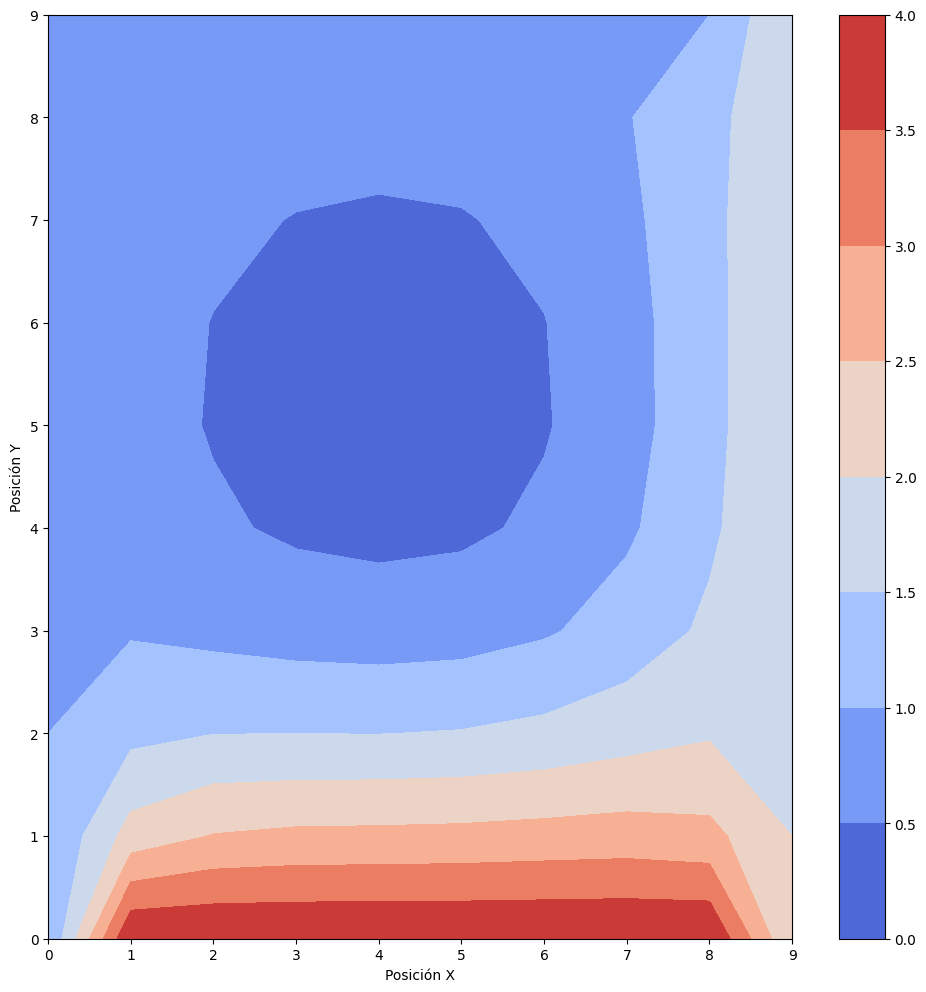

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (código previo)

def plot_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize):
    # Realizar la simulación del calor
    T = simulacion_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)

    # Crear una figura para la gráfica de contorno
    plt.figure(figsize=figsize)

    # Generar una gráfica de contorno (heatmap) que representa la distribución de temperatura
    plt.contourf(T[:, :, -1], cmap='coolwarm')  # Usamos un mapa de colores 'coolwarm' para representar la temperatura

    # Añadir una barra de colores para indicar los valores de temperatura
    plt.colorbar()

    # Establecer etiquetas de ejes
    plt.xlabel('Posición X')
    plt.ylabel('Posición Y')

    # Mostrar la gráfica
    plt.show()

# Ejemplo de uso para la gráfica de contorno
plot_calor(placa_dimension, temp_borde_superior, temp_inicial, temp_borde_inferior, temp_borde_lateral_izquierda, temp_borde_lateral_derecha, figsize)
